<a href="https://colab.research.google.com/github/AdvayDhar/RenAIssance25/blob/main/RenAIssance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GSoC 2025
#Preview
#RenAIssance
#ADVAY DHAR
#Renaissance Doc Syntheic Generation

In [2]:
#We first focus purely on perfect, with no degradation text generation

''' We first focus on the type of characters available in the documents
1)Spanish alphabets
2)Article beginning character, which is extremely stylised. The features of this include
     a) A square box, with the letter prominently featured in the centre.
     b) A intricately designed background design.
3)Paragraph starts, which feature a larger undesigned capital letter version of the alphabet.

Our approach focuses on creating a database of each letter for (1) and (3). We can create a GAN/Diffusion Based approach for (2). '''

' We first focus on the type of characters available in the documents\n1)Spanish alphabets\n2)Article beginning character, which is extremely stylised. The features of this include\n     a) A square box, with the letter prominently featured in the centre.\n     b) A intricately designed background design.\n3)Paragraph starts, which feature a larger undesigned capital letter version of the alphabet.\n\nOur approach focuses on creating a database of each letter for (1) and (3). We can create a GAN/Diffusion Based approach for (2). '

In [3]:
#uploading for 2, we can expand this database easily from online sources of Renaissance Spanish Literature.
# For the time being, I am assuming that this image I got from the Internet is a sample of a character generated form our GAN model.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import shutil
import os

# Delete and recreate the database folder
if os.path.exists("database"):
    shutil.rmtree("database")
os.makedirs("database")


In [5]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()

# Load image chardecorscontd
img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold and invert
_, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours top to bottom, left to right
bounding_boxes = [cv2.boundingRect(c) for c in contours]
contours = [c for _, c in sorted(zip(bounding_boxes, contours), key=lambda b: (b[0][1]//50, b[0][0]))]

# Predefined character list (update as per your image layout)
char_list = list("ABCDEFGHIJKLMNOPZQRSTUVWXY")
char_index = 0

# Create output directory
os.makedirs("database", exist_ok=True)

for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)
    if w < 30 or h < 30:
        continue  # Skip noise

    char_img = image[y:y+h, x:x+w]
    resized = cv2.resize(char_img, (256, 256))

    if char_index >= len(char_list):
        break  # Avoid going out of bounds

    label = char_list[char_index]
    char_index += 1

    save_dir = f"database/{label}"
    os.makedirs(save_dir, exist_ok=True)

    save_path = os.path.join(save_dir, f"{label}_{i}.jpg")
    cv2.imwrite(save_path, resized)

    print(f"Saved {save_path}")

print("✅ All characters processed and grouped by label!")


Saving chardecorscontd.jpg to chardecorscontd.jpg
Saved database/A/A_0.jpg
Saved database/B/B_1.jpg
Saved database/C/C_2.jpg
Saved database/D/D_3.jpg
Saved database/E/E_4.jpg
Saved database/F/F_5.jpg
Saved database/G/G_6.jpg
Saved database/H/H_7.jpg
Saved database/I/I_8.jpg
Saved database/J/J_9.jpg
Saved database/K/K_10.jpg
Saved database/L/L_11.jpg
Saved database/M/M_12.jpg
Saved database/N/N_13.jpg
Saved database/O/O_14.jpg
Saved database/P/P_15.jpg
Saved database/Z/Z_16.jpg
Saved database/Q/Q_17.jpg
Saved database/R/R_18.jpg
Saved database/S/S_19.jpg
Saved database/T/T_20.jpg
Saved database/U/U_21.jpg
Saved database/V/V_22.jpg
Saved database/W/W_23.jpg
Saved database/X/X_24.jpg
Saved database/Y/Y_25.jpg
✅ All characters processed and grouped by label!


In [6]:
#we have a nice database of (2) to be used whenver we need a new article starting decorative character.

In [7]:
#now we make a few observations:
''' Since we are dealing with printed data, we can Use a similar database like approach. The size and extent of the database can be improved
with whatever original documents we can extract from the internet archives on ranaiisance era docs.

a) Our Database should contain various instabces of how letters were printed in during these eras. We will store a few examples of
how a letter looks in each document. Lets call this an instance of the character. We will store various instances in a
database specific to a character. We can then group the database for each character into categories such as stylised fonts/normal fonts etc.

eg: CHAR A->Normal->Doc1->example0
                        ->example1
                  ->Doc2->example0
                        ->example1
                        ->example2
          ->Stylised->Doc3->example0
                          ->example1

    CHAR B->.....


b) We will only use ONE of the instances (to be selected in random) in the database to genrate all of the instances of the said letter
inside a single document. We will
      i) Use a small GAN/Diffusion model to generate very minor changes to the particular instance of the characters we
      are going to use. this will signify that not everytime a character is printed it will be exactly same.
      ii) We will use this enlargened dataset for the instaance of the character and use one of these character randomly
      whenever we are going to generate a new document.
'''

' Since we are dealing with printed data, we can Use a similar database like approach. The size and extent of the database can be improved \nwith whatever original documents we can extract from the internet archives on ranaiisance era docs.\n\na) Our Database should contain various instabces of how letters were printed in during these eras. We will store a few examples of \nhow a letter looks in each document. Lets call this an instance of the character. We will store various instances in a \ndatabase specific to a character. We can then group the database for each character into categories such as stylised fonts/normal fonts etc.\n\neg: CHAR A->Normal->Doc1->example0\n                        ->example1\n                  ->Doc2->example0\n                        ->example1\n                        ->example2\n          ->Stylised->Doc3->example0\n                          ->example1\n\n    CHAR B->.....                                    \n\n\nb) We will only use ONE of the instances 

In [8]:
!sudo apt install tesseract-ocr tesseract-ocr-spa -y
!pip install pytesseract opencv-python-headless

import cv2
import pytesseract
from pytesseract import Output
from PIL import Image
import numpy as np
import os
from google.colab import files

# Upload image croppednormalsample
uploaded = files.upload()
img_path = list(uploaded.keys())[0]



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-spa is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


Saving croppednormalsample.jpg to croppednormalsample.jpg


In [9]:
# Load and preprocess image
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)  # Slight blur to reduce noise

# OCR config
MIN_CONFIDENCE = 85
SPANISH_WHITELIST = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzáéíóúüñÁÉÍÓÚÜÑ0123456789&"

# Clear or create the database directory
import shutil
if os.path.exists("normal_database"):
    shutil.rmtree("normal_database")
os.makedirs("normal_database", exist_ok=True)

# OCR with Spanish language
data = pytesseract.image_to_data(gray, lang='spa', output_type=Output.DICT)

print("📦 Extracting high-confidence characters...")

count_map = {}

for i in range(len(data['text'])):
    word = data['text'][i]
    conf = int(data['conf'][i])

    if conf < MIN_CONFIDENCE or not word.strip():
        continue

    x =  data['left'][i]
    y = data['top'][i]
    w = data['width'][i]
    h = data['height'][i]


    # Split into individual characters (optional: include accents and tildes)
    for idx, char in enumerate(word):
        if char not in SPANISH_WHITELIST:
            continue

        char_crop = img[y:y+h, x + idx * (w // len(word))-15: x + (idx + 1) * (w // len(word))+15]

        #resized = cv2.resize(char_crop, (128, 128))

        # Folder and save path
        folder = f"normal_database/{char}"
        os.makedirs(folder, exist_ok=True)
        count = count_map.get(char, 0)
        save_path = os.path.join(folder, f"{char}_{count}.jpg")
        cv2.imwrite(save_path, char_crop)
        count_map[char] = count + 1

        print(f"✅ Saved '{char}' with confidence {conf} → {save_path}")

print("🎉 Done! All high-confidence characters saved in 'normal_database/'")


📦 Extracting high-confidence characters...
✅ Saved 'd' with confidence 89 → normal_database/d/d_0.jpg
✅ Saved 'i' with confidence 89 → normal_database/i/i_0.jpg
✅ Saved 'v' with confidence 89 → normal_database/v/v_0.jpg
✅ Saved 'i' with confidence 89 → normal_database/i/i_1.jpg
✅ Saved 'n' with confidence 89 → normal_database/n/n_0.jpg
✅ Saved 'á' with confidence 89 → normal_database/á/á_0.jpg
✅ Saved 's' with confidence 89 → normal_database/s/s_0.jpg
✅ Saved 'l' with confidence 93 → normal_database/l/l_0.jpg
✅ Saved 'e' with confidence 93 → normal_database/e/e_0.jpg
✅ Saved 's' with confidence 93 → normal_database/s/s_1.jpg
✅ Saved 'f' with confidence 92 → normal_database/f/f_0.jpg
✅ Saved 'a' with confidence 92 → normal_database/a/a_0.jpg
✅ Saved 'g' with confidence 92 → normal_database/g/g_0.jpg
✅ Saved 'r' with confidence 92 → normal_database/r/r_0.jpg
✅ Saved 'a' with confidence 92 → normal_database/a/a_1.jpg
✅ Saved 'd' with confidence 92 → normal_database/d/d_1.jpg
✅ Saved 'o' w

In [10]:
#We can see that some of the saved characters are a bit inaccurate, we can address it by some small routines:
#like image segmentations to separate out the ends of the preceeding characters/succeeding characters. We can
#even create our personalised OCR based on Yukinori Yamamoto's work last year in RenAIssance.

In [11]:
#next job is to generate a beautiful PERFECT article to substitute so that we can create.
#lets preprocess a bit more for uniformity in character dimensions.

In [12]:
import os
import shutil
import cv2
import numpy as np

SOURCE_DIR = "normal_database"
CLEANED_DIR = "baseline_trimmed_database"

# Reinitialize CLEANED_DIR
if os.path.exists(CLEANED_DIR):
    shutil.rmtree(CLEANED_DIR)
os.makedirs(CLEANED_DIR)

def crop_and_binarize(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Threshold for detecting white background
    _, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

    # Find bottom-most non-white row
    rows = binary.shape[0]
    for bottom in reversed(range(rows)):
        if np.any(binary[bottom] < 250):
            break

    cropped = gray[:bottom + 1, :]  # work in grayscale

    # Add a 1px white row at the bottom
    height, width = cropped.shape
    padding = np.ones((1, width), dtype=np.uint8) * 255
    result = np.vstack((cropped, padding))

    # Final binarization to clean up ink noise and ensure black-and-white
    _, final_binary = cv2.threshold(result, 127, 255, cv2.THRESH_BINARY)

    return final_binary

# Process all character images
for folder in os.listdir(SOURCE_DIR):
    folder_path = os.path.join(SOURCE_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    dest_folder = os.path.join(CLEANED_DIR, folder)
    os.makedirs(dest_folder, exist_ok=True)

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path)
        if image is None:
            continue

        processed_img = crop_and_binarize(image)
        save_path = os.path.join(dest_folder, file)
        cv2.imwrite(save_path, processed_img)

print("✅ All character images trimmed, binarized, and saved with baseline alignment.")


✅ All character images trimmed, binarized, and saved with baseline alignment.


In [13]:
import shutil
import os

# Delete the existing sidecleaned_database directory if it exists
if os.path.exists("sidecleaned_database"):
    shutil.rmtree("sidecleaned_database")
    print("🧹 Cleaned up existing 'sidecleaned_database' folder.")

# Recreate the output directory
os.makedirs("sidecleaned_database", exist_ok=True)
print("✅ Ready to populate fresh sidecleaned database.")

import numpy as np
import cv2
import os
from PIL import Image

input_dir = "baseline_trimmed_database"
output_dir = "sidecleaned_database"
os.makedirs(output_dir, exist_ok=True)

for label in os.listdir(input_dir):
    label_path = os.path.join(input_dir, label)
    if not os.path.isdir(label_path):
        continue

    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        _, binary = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV)

        col_sums = np.sum(binary, axis=0)

        # Define threshold as 5% of max column sum (adjustable)
        max_ink = np.max(col_sums)
        threshold = 0.05 * max_ink

        # Find left and right bounds
        left = 0
        lflag=left
        while left < 0.3* len(col_sums) :
          if (col_sums[left] < threshold):
              lflag=left
              break
          else:
            left += 1

        right = len(col_sums) - 1
        rflag=right
        while right >  0.3* len(col_sums) :
          if (col_sums[right] < threshold):
              rflag=right
              break
          else:
            right -= 1

        # Crop only if we found a meaningful region
        if right > left:
            cropped = img[:, lflag:rflag+1]
            save_path = os.path.join(output_dir, label, img_name)
            cv2.imwrite(save_path, cropped)


✅ Ready to populate fresh sidecleaned database.


In [14]:
import os
import cv2
import numpy as np

import shutil
import os

# Delete the existing sidecleaned_database directory if it exists
if os.path.exists("standardized_normal_database"):
    shutil.rmtree("standardized_normal_database")
    print("🧹 Cleaned up existing 'standardized_normal_database' folder.")

# Constants
TARGET_SIZE = 27  # Standard size (in pixels) for printed characters
SOURCE_DIR = "sidecleaned_database"
DEST_DIR = "standardized_normal_database"

# Create target directory
os.makedirs(DEST_DIR, exist_ok=True)

def resize_and_pad(image, size):
    h, w = image.shape[:2]
    scale = size / max(h, w)
    resized = cv2.resize(image, (int(w * scale), int(h * scale)), interpolation=cv2.INTER_AREA)

    h_pad, w_pad = resized.shape[:2]
    pad_top = (size - h_pad) // 2
    pad_bottom = size - h_pad - pad_top
    pad_left = (size - w_pad) // 2
    pad_right = size - w_pad - pad_left

    padded = cv2.copyMakeBorder(
        resized, pad_top, pad_bottom, pad_left, pad_right,
        borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255]
    )
    return padded

# Process each folder and image
for folder in os.listdir(SOURCE_DIR):
    folder_path = os.path.join(SOURCE_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    dest_folder_path = os.path.join(DEST_DIR, folder)
    os.makedirs(dest_folder_path, exist_ok=True)

    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        image = cv2.imread(img_path)
        if image is None:
            continue

        standardized = resize_and_pad(image, TARGET_SIZE)
        save_path = os.path.join(dest_folder_path, img_file)
        cv2.imwrite(save_path, standardized)

print("✅ All characters have been resized, padded, and saved to 'standardized_normal_database'")


✅ All characters have been resized, padded, and saved to 'standardized_normal_database'


In [15]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import shutil

SOURCE_DIR = "standardized_normal_database"
DEST_DIR = "cleaned_database"

blank_threshold = 250
blank_ratio_threshold = 0.99

if os.path.exists(DEST_DIR):
    shutil.rmtree(DEST_DIR)
os.makedirs(DEST_DIR, exist_ok=True)

deleted_blank = 0
deleted_multi_component = 0
saved = 0
total_checked = 0

def count_horizontal_regions(contours):
    if not contours:
        return 0

    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    bounding_boxes.sort(key=lambda b: b[0])  # Sort by x

    merged_regions = []
    for box in bounding_boxes:
        x, _, w, _ = box
        if not merged_regions:
            merged_regions.append([x, x + w])
        else:
            last = merged_regions[-1]
            if x <= last[1]:  # overlapping
                last[1] = max(last[1], x + w)
            else:
                merged_regions.append([x, x + w])

    return len(merged_regions)

for char_folder in tqdm(os.listdir(SOURCE_DIR)):
    src_folder_path = os.path.join(SOURCE_DIR, char_folder)
    if not os.path.isdir(src_folder_path):
        continue

    dest_folder_path = os.path.join(DEST_DIR, char_folder)
    os.makedirs(dest_folder_path, exist_ok=True)

    for file in os.listdir(src_folder_path):
        file_path = os.path.join(src_folder_path, file)
        image = cv2.imread(file_path)
        if image is None:
            continue

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        total_pixels = gray.size
        white_pixels = np.sum(gray > blank_threshold)
        white_ratio = white_pixels / total_pixels

        total_checked += 1

        # Reject blank images
        if white_ratio > blank_ratio_threshold:
            deleted_blank += 1
            continue

        # Binarize for contour detection
        _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        horizontal_regions = count_horizontal_regions(contours)
        if horizontal_regions > 1:
            deleted_multi_component += 1
            continue

        # Save to cleaned dir
        new_path = os.path.join(dest_folder_path, file)
        cv2.imwrite(new_path, image)
        saved += 1

print(f"\n✅ Total checked: {total_checked}")
print(f"💾 Saved to '{DEST_DIR}': {saved}")
print(f"🗑️ Blank images rejected: {deleted_blank}")
print(f"❌ Multi-horizontal-component images rejected: {deleted_multi_component}")


100%|██████████| 37/37 [00:00<00:00, 520.05it/s]


✅ Total checked: 496
💾 Saved to 'cleaned_database': 378
🗑️ Blank images rejected: 3
❌ Multi-horizontal-component images rejected: 115


In [16]:
import os
import cv2
import numpy as np
import shutil
from tqdm import tqdm

SOURCE_DIR = "cleaned_database"
CLEANED_DIR = "horizontal_trimmed_database"

# Clean destination folder
if os.path.exists(CLEANED_DIR):
    shutil.rmtree(CLEANED_DIR)
os.makedirs(CLEANED_DIR, exist_ok=True)

def crop_horizontal_whitespace(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)

    # Detect non-white columns
    cols = binary.shape[1]
    left, right = 0, cols - 1

    for l in range(cols):
        if np.any(binary[:, l] < 250):
            left = l
            break
    for r in reversed(range(cols)):
        if np.any(binary[:, r] < 250):
            right = r
            break

    # Crop and add 1px padding on both sides
    cropped = image[:, left:right + 1]
    height, width = cropped.shape[:2]
    left_pad = np.ones((height, 1, 3), dtype=np.uint8) * 255
    right_pad = np.ones((height, 1, 3), dtype=np.uint8) * 255
    padded = np.hstack((left_pad, cropped, right_pad))

    return padded

total = 0

for folder in tqdm(os.listdir(SOURCE_DIR)):
    folder_path = os.path.join(SOURCE_DIR, folder)
    if not os.path.isdir(folder_path):
        continue

    dest_folder = os.path.join(CLEANED_DIR, folder)
    os.makedirs(dest_folder, exist_ok=True)

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        image = cv2.imread(file_path)
        if image is None:
            continue

        trimmed = crop_horizontal_whitespace(image)
        save_path = os.path.join(dest_folder, file)
        cv2.imwrite(save_path, trimmed)
        total += 1

print(f"\n✅ Done! Total images trimmed horizontally and saved: {total}")
print(f"📂 Output directory: '{CLEANED_DIR}'")


100%|██████████| 37/37 [00:00<00:00, 299.42it/s]


✅ Done! Total images trimmed horizontally and saved: 378
📂 Output directory: 'horizontal_trimmed_database'


In [17]:
#Some spanish para:

text='''El impacto de la tecnología en la sociedad moderna

En la actualidad, la tecnología ocupa un lugar central en la vida cotidiana de las personas, transformando no solo la forma en la que nos comunicamos, sino también cómo trabajamos, aprendemos y nos relacionamos con el mundo que nos rodea. Desde los teléfonos inteligentes hasta la inteligencia artificial, cada avance ha generado una serie de cambios profundos que afectan tanto a nivel individual como colectivo. El acceso a internet ha permitido que millones de personas puedan conectarse instantáneamente, independientemente de su ubicación geográfica. Este fenómeno ha impulsado la globalización, favoreciendo la interacción entre culturas y facilitando el intercambio de ideas, conocimientos y oportunidades. Sin embargo, este mismo avance también ha planteado nuevos desafíos, como la sobreexposición a información, la pérdida de privacidad y la dependencia excesiva de los dispositivos tecnológicos.

Uno de los ámbitos más transformados por la tecnología ha sido el de la educación. Hoy en día, gracias a las plataformas virtuales, los estudiantes pueden acceder a cursos en línea, participar en clases a distancia y obtener certificaciones sin necesidad de asistir físicamente a una institución educativa. Esta flexibilidad ha democratizado el aprendizaje, permitiendo que personas de diferentes contextos puedan formarse y desarrollarse profesionalmente. No obstante, también ha dejado en evidencia una brecha digital entre quienes tienen acceso a dispositivos y conexión estable, y quienes carecen de estos recursos, lo que acentúa las desigualdades sociales. De igual manera, en el ámbito laboral, la automatización y la digitalización han optimizado procesos, aumentando la eficiencia de muchas industrias. No obstante, también han generado preocupación sobre la posible sustitución de empleos humanos por máquinas, lo que obliga a repensar los modelos económicos y preparar a la fuerza laboral para un entorno cada vez más tecnificado.

En cuanto a las relaciones humanas, las redes sociales han revolucionado la manera en que interactuamos. Plataformas como Instagram, WhatsApp, Facebook y TikTok han redefinido la comunicación, haciendo posible mantener contacto constante con personas de todo el mundo. Aunque esto ha fortalecido ciertos lazos y ha dado voz a movimientos sociales, también ha creado una realidad en la que muchas interacciones se dan de forma superficial. Además, el uso constante de estas plataformas ha sido vinculado a problemas de salud mental como la ansiedad, la depresión y la disminución de la autoestima, especialmente entre los jóvenes. La necesidad de validación a través de "likes" y comentarios puede llevar a una distorsión de la autoimagen y a una dependencia emocional de lo virtual.

Por otro lado, la tecnología ha traído enormes beneficios en el sector salud. Desde diagnósticos más precisos gracias a algoritmos inteligentes hasta intervenciones quirúrgicas asistidas por robots, el impacto es innegable. La telemedicina permite que pacientes en zonas remotas reciban atención médica especializada sin necesidad de desplazarse. A su vez, el desarrollo de aplicaciones móviles que monitorean signos vitales o promueven hábitos saludables han hecho posible una medicina más preventiva y personalizada. Sin embargo, esta integración tecnológica también plantea preguntas éticas sobre el manejo de datos personales, el acceso equitativo a estos avances y la necesidad de mantener el factor humano en la atención médica.

Además, la tecnología ha cambiado nuestra manera de consumir contenido cultural y de entretenimiento. El acceso a películas, música, libros y videojuegos desde cualquier dispositivo ha democratizado el acceso al arte, pero también ha afectado a las industrias tradicionales y ha modificado las formas de producción y distribución de contenido. Al mismo tiempo, ha surgido un nuevo perfil de consumidor, más activo, exigente y participativo, que no solo consume sino también crea contenido a través de plataformas como YouTube o Twitch.

En definitiva, la tecnología es una herramienta poderosa que ha ampliado las posibilidades humanas en casi todos los ámbitos de la vida. Sin embargo, su impacto no es neutral; depende del uso que le demos como sociedad. Es fundamental fomentar un uso responsable, ético y consciente de la tecnología, que promueva el bienestar colectivo y no solo el desarrollo económico. También es necesario establecer marcos legales y educativos que acompañen este avance, garantizando que nadie quede atrás en esta transformación. La clave está en equilibrar el progreso tecnológico con los valores humanos, priorizando siempre la dignidad, la equidad y el respeto por los demás.



'''

⚠️ Missing or unreadable image for ','
⚠️ Missing or unreadable image for ','
⚠️ Missing or unreadable image for ','
⚠️ Missing or unreadable image for 'é'
⚠️ Missing or unreadable image for ','
⚠️ No valid images in folder for '.'


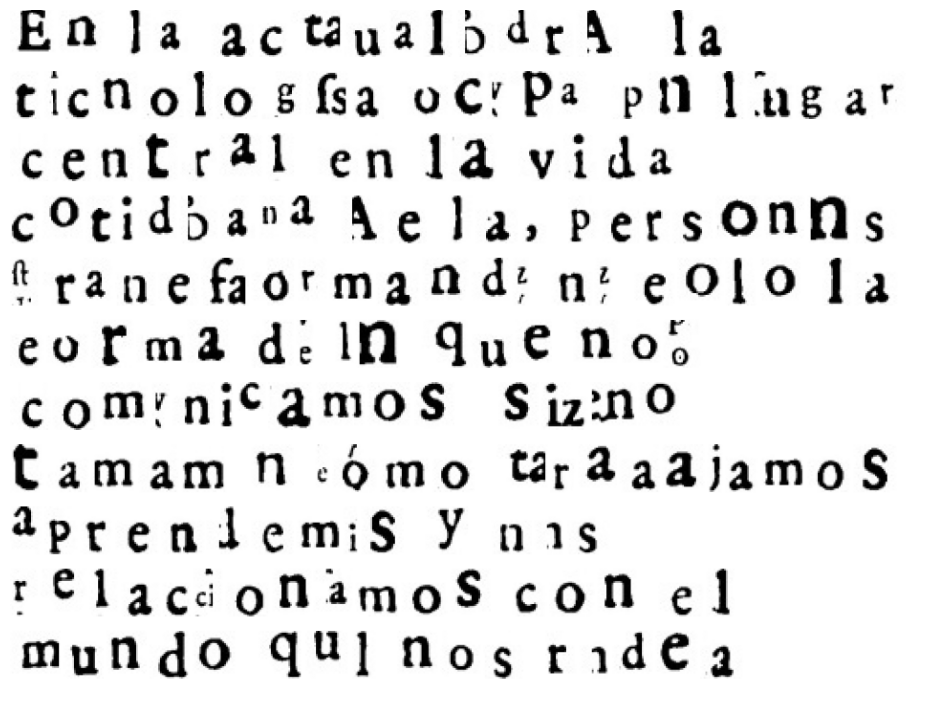

In [18]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot as plt

# Parameters
db_folder = "horizontal_trimmed_database"
char_spacing = 3
space_width = 20
line_spacing = 15
target_height = 50
max_line_width = 1000  # Max width per line before wrapping

def get_char_image(char):
    char_folder = os.path.join(db_folder, char)
    if not os.path.exists(char_folder) or not os.listdir(char_folder):
        print(f"⚠️ Missing or unreadable image for '{char}'")
        return 255 * np.ones((target_height, 20), dtype=np.uint8)

    img_files = [f for f in os.listdir(char_folder) if f.endswith('.jpg') or f.endswith('.png')]
    if not img_files:
        print(f"⚠️ No valid images in folder for '{char}'")
        return 255 * np.ones((target_height, 20), dtype=np.uint8)

    img_path = os.path.join(char_folder, random.choice(img_files))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Could not read image for '{char}'")
        return 255 * np.ones((target_height, 20), dtype=np.uint8)

    # Resize preserving aspect ratio
    aspect_ratio = img.shape[1] / img.shape[0]
    new_width = int(target_height * aspect_ratio)
    img_resized = cv2.resize(img, (new_width, target_height), interpolation=cv2.INTER_AREA)
    return img_resized

def build_word_image(word):
    char_imgs = []
    for c in word:
        img = get_char_image(c)
        char_imgs.append(img)
        # Add spacing between characters
        char_imgs.append(np.ones((target_height, char_spacing), dtype=np.uint8) * 255)
    if char_imgs:
        return cv2.hconcat(char_imgs)
    else:
        return None

# Paragraph
text = """En la actualidad, la tecnología ocupa un lugar central en la vida cotidiana de las personas, transformando no solo la forma en la que nos comunicamos, sino también cómo trabajamos, aprendemos y nos relacionamos con el mundo que nos rodea."""

lines = []
current_line_imgs = []
current_line_width = 0

for line_text in text.strip().split("\n"):
    words = line_text.strip().split(" ")

    for word in words:
        word_img = build_word_image(word)
        if word_img is None:
            continue

        word_width = word_img.shape[1]
        space_img = np.ones((target_height, space_width), dtype=np.uint8) * 255

        if current_line_width + word_width > max_line_width:
            # Commit the line
            if current_line_imgs:
                line_image = cv2.hconcat(current_line_imgs)
                lines.append(line_image)
            # Start new line
            current_line_imgs = [word_img, space_img]
            current_line_width = word_width + space_width
        else:
            current_line_imgs.extend([word_img, space_img])
            current_line_width += word_width + space_width

# Add the last line
if current_line_imgs:
    line_image = cv2.hconcat(current_line_imgs)
    lines.append(line_image)

# Pad lines to same width
max_width = max(line.shape[1] for line in lines)
for i in range(len(lines)):
    if lines[i].shape[1] < max_width:
        pad = np.ones((target_height, max_width - lines[i].shape[1]), dtype=np.uint8) * 255
        lines[i] = cv2.hconcat([lines[i], pad])

# Add line spacing and vertically concatenate
lines_with_spacing = [
    cv2.copyMakeBorder(line, 0, line_spacing, 0, 0, cv2.BORDER_CONSTANT, value=255)
    for line in lines
]
full_para = cv2.vconcat(lines_with_spacing)

# Show final image
plt.figure(figsize=(12, 10))
plt.imshow(full_para, cmap='gray')
plt.axis('off')
plt.show()

#tapestry of characters approach, can be improved radically


In [19]:
#the above is a rough show of how we can sample specific document's font

#it is very easy to create a stronger preprocessing subroutine and create a .ttf file that suffices our
#needs.

In [20]:
#we now focus on creating blemishes.

#for our demo purposes we assume that .ttf file that we generate is the classic font for modern spanish

In [21]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,804 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [22]:
import os
import cv2
import pytesseract
import numpy as np

DATABASE_DIR = "horizontal_trimmed_database"
SELECTED_DIR = "ttf_best_chars"

os.makedirs(SELECTED_DIR, exist_ok=True)

SPANISH_WHITELIST = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzáéíóúüñÁÉÍÓÚÜÑ0123456789&"

config = "--psm 10 --oem 3 -c tessedit_char_whitelist=" + SPANISH_WHITELIST

def is_valid_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    num_labels, labels = cv2.connectedComponents(binary)
    return num_labels == 2  # Only background + 1 component

def get_best_image(folder, char):
    best_score = -1
    best_img = None

    for file in os.listdir(folder):
        path = os.path.join(folder, file)
        img = cv2.imread(path)

        if img is None or not is_valid_image(img):
            continue

        resized = cv2.resize(img, (128, 128))
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        result = pytesseract.image_to_data(
            gray, config=config, output_type=pytesseract.Output.DICT
        )

        for i in range(len(result['text'])):
            pred = result['text'][i].strip()
            conf = int(result['conf'][i])
            if pred == char and conf > best_score:
                best_score = conf
                best_img = img

    return best_img

# Loop through each character folder
for char in os.listdir(DATABASE_DIR):
    folder = os.path.join(DATABASE_DIR, char)
    if not os.path.isdir(folder) or char not in SPANISH_WHITELIST:
        continue

    best = get_best_image(folder, char)
    if best is not None:
        save_path = os.path.join(SELECTED_DIR, f"{char}.png")
        cv2.imwrite(save_path, best)
        print(f"✅ Selected best image for '{char}' → {save_path}")
    else:
        print(f"⚠️ No valid image found for '{char}'")

print("🎯 Character selection complete. Images saved in:", SELECTED_DIR)


✅ Selected best image for 'S' → ttf_best_chars/S.png
✅ Selected best image for 'q' → ttf_best_chars/q.png
⚠️ No valid image found for 'j'
✅ Selected best image for 'A' → ttf_best_chars/A.png
⚠️ No valid image found for 'Y'
✅ Selected best image for 'm' → ttf_best_chars/m.png
⚠️ No valid image found for 'J'
⚠️ No valid image found for 'E'
✅ Selected best image for 'b' → ttf_best_chars/b.png
⚠️ No valid image found for 'i'
✅ Selected best image for 'y' → ttf_best_chars/y.png
⚠️ No valid image found for 'D'
✅ Selected best image for 'p' → ttf_best_chars/p.png
⚠️ No valid image found for 'z'
⚠️ No valid image found for 'v'
✅ Selected best image for 'l' → ttf_best_chars/l.png
⚠️ No valid image found for 'ó'
✅ Selected best image for 'N' → ttf_best_chars/N.png
✅ Selected best image for 'V' → ttf_best_chars/V.png
⚠️ No valid image found for 'o'
⚠️ No valid image found for 's'
✅ Selected best image for 'a' → ttf_best_chars/a.png
⚠️ No valid image found for 'á'
⚠️ No valid image found for 'í'
✅

In [23]:
import os
import shutil
import random

ORIGINAL_DIR = "ttf_best_chars"
FILLED_DIR = "ttf_database_filled"

# Step 1: Copy original database to filled version
if os.path.exists(FILLED_DIR):
    shutil.rmtree(FILLED_DIR)
shutil.copytree(ORIGINAL_DIR, FILLED_DIR)

# Extended fallback map with punctuation
FALLBACK_MAP = {
    'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u', 'ü': 'u', 'ñ': 'n',
    'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U', 'Ü': 'U', 'Ñ': 'N',
    '¡': '!', '¿': '?',
    ',': '.', '.': '.', ':': '.', ';': '.', "'": "'", '"': "'"
}

added_count = 0

# Step 2: Fill missing character folders in the new directory
for target_char, fallback_char in FALLBACK_MAP.items():
    target_folder = os.path.join(FILLED_DIR, target_char)
    fallback_folder = os.path.join(FILLED_DIR, fallback_char)

    if os.path.exists(target_folder):
        if os.listdir(target_folder):  # already filled
            continue
    else:
        os.makedirs(target_folder, exist_ok=True)

    if os.path.exists(fallback_folder):
        fallback_images = [
            f for f in os.listdir(fallback_folder)
            if os.path.isfile(os.path.join(fallback_folder, f))
        ]
        if fallback_images:
            src_image_path = os.path.join(fallback_folder, random.choice(fallback_images))
            dst_image_path = os.path.join(target_folder, f"{target_char}_fallback.jpg")
            shutil.copy(src_image_path, dst_image_path)
            print(f"✅ Filled '{target_char}' using fallback '{fallback_char}'")
            added_count += 1

print(f"\n📁 New directory: '{FILLED_DIR}' created.")
print(f"🎯 Total fallback characters substituted: {added_count}")


✅ Filled ',' using fallback '.'
✅ Filled ':' using fallback '.'
✅ Filled ';' using fallback '.'

📁 New directory: 'ttf_database_filled' created.
🎯 Total fallback characters substituted: 3


In [41]:
#now we can generate a ttf file

In [100]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import textwrap
import random
import math

def generate_aged_text_image(text, font_path="/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", font_size=15, image_width=400, margin=15, bg_color=(245, 235, 200), text_color=(20, 20, 20), blur_radius=0.3):
    # === LOAD FONT ===
    font = ImageFont.truetype(font_path, font_size)

    # === WRAP TEXT ===
    wrapped_text = textwrap.fill(text, width=60)

    # === ESTIMATE HEIGHT ===
    dummy_img = Image.new("RGB", (image_width, 2000))
    draw = ImageDraw.Draw(dummy_img)
    text_bbox = draw.textbbox((0, 0), wrapped_text, font=font)
    text_height = text_bbox[3] - text_bbox[1] + 2 * margin

    # === CREATE BASE IMAGE (RGBA for transparency) ===
    image = Image.new("RGBA", (image_width, text_height), color=bg_color + (255,))
    draw = ImageDraw.Draw(image)
    draw.text((margin, margin), wrapped_text, font=font, fill=text_color + (255,))

    # === ADD AGING DOTS ===
    for _ in range(600):
        x = random.randint(0, image_width - 1)
        y = random.randint(0, text_height - 1)
        dot_color = (random.randint(100, 140), random.randint(90, 120), random.randint(70, 90), 255)
        image.putpixel((x, y), dot_color)

    # === ADD ANGLED STROKES ===
    for _ in range(9):
        x1 = random.randint(0, image_width - 20)
        y1 = random.randint(0, text_height - 20)
        angle_x = random.randint(-10, 10)
        angle_y = random.randint(5, 15)
        x2 = x1 + angle_x
        y2 = y1 + angle_y
        stroke_color = (80, 70, 60, 255)
        draw.line((x1, y1, x2, y2), fill=stroke_color, width=1)

    # === CONVEX TRANSPARENT BLOTCHES WITH DISTORTION ===
    for _ in range(random.randint(3, 6)):
        blot_size = random.randint(10, 40)
        blot_img = Image.new("RGBA", (blot_size, blot_size), (0, 0, 0, 0))
        blot_draw = ImageDraw.Draw(blot_img)

        # Generate convex polygon
        center = (blot_size // 2, blot_size // 2)
        radius = blot_size // 2 - 2
        num_points = random.randint(26, 40)
        angle_step = 2 * math.pi / num_points
        points = []
        for i in range(num_points):
            angle = i * angle_step
            r = radius * random.uniform(0.8, 1.0)
            x = center[0] + int(r * math.cos(angle))
            y = center[1] + int(r * math.sin(angle))
            points.append((x, y))

        # Squeeze the polygon (e.g., reduce the width by 60% and height by 90%)
        squeeze_factor_x = random.uniform(0.80, 1.0)  # Squeeze along the x-axis
        squeeze_factor_y = random.uniform(0.80, 1.0)  # Keep y-axis mostly intact
        squeezed_points = [
            (int(x * squeeze_factor_x), int(y * squeeze_factor_y)) for x, y in points
        ]

        # Very dark grey transparent blotch
        blot_color = (0, 0, 0, random.randint(120, 180))  # Very dark grey with alpha

        blot_draw.polygon(squeezed_points, fill=blot_color)

        # Apply the distortion using LANCZOS resampling
        blot_img = blot_img.resize(
            (int(blot_size * squeeze_factor_x), int(blot_size * squeeze_factor_y)),
            Image.Resampling.LANCZOS,
        )

        # Paste blotch with transparency
        x = random.randint(0, image_width - blot_size)
        y = random.randint(0, text_height - blot_size)
        image.alpha_composite(blot_img, (x, y))

    # === FINAL TOUCH: LIGHT BLUR (OPTIONAL) ===
    image = image.filter(ImageFilter.GaussianBlur(radius=blur_radius))

    # === ADD WHITE BORDER ===
    border = 5
    final_img = Image.new("RGBA", (image.width + 2 * border, image.height + 2 * border), (255, 255, 255, 255))
    final_img.paste(image, (border, border), mask=image)

    # === FINAL TOUCH: LIGHT BLUR (OPTIONAL) ===
    final_img = final_img.filter(ImageFilter.GaussianBlur(radius=blur_radius))
    final_img.show()


    return final_img

# Example usage:
text = '''En el vasto mundo de la literatura, la narrativa y la poesía han sido medios fundamentales para explorar las emociones humanas...'''
output_image = generate_aged_text_image(text)
output_image.show()
output_image.save("aged_text_image.png")


In [102]:
text1='''En el mundo moderno, la tecnología ha transformado radicalmente la forma en que vivimos, trabajamos y nos relacionamos. Desde la invención de la rueda hasta el advenimiento de la inteligencia artificial, los avances tecnológicos han impulsado el progreso humano en múltiples frentes. Uno de los mayores logros de la tecnología ha sido la creación de dispositivos de comunicación, como el teléfono móvil, que nos permite conectarnos con cualquier persona en cualquier parte del mundo en tiempo real. Además, la tecnología ha facilitado el acceso a la información, lo que ha democratizado el conocimiento y ha permitido a personas de diferentes contextos acceder a recursos educativos, científicos y culturales. Sin embargo, a pesar de los beneficios evidentes de la tecnología, también ha planteado desafíos significativos. La automatización ha reemplazado muchos trabajos tradicionales, lo que ha generado preocupaciones sobre el desempleo y la desigualdad económica. Además, el uso excesivo de las redes sociales ha provocado un aumento en la ansiedad y la depresión entre los jóvenes, ya que la constante comparación con las vidas idealizadas de los demás puede generar sentimientos de insuficiencia. A nivel global, la tecnología también ha contribuido al calentamiento global, ya que la producción masiva de dispositivos electrónicos y la generación de energía a partir de fuentes no renovables ha aumentado la huella de carbono del planeta. Por lo tanto, aunque la tecnología ha mejorado significativamente nuestras vidas, también es importante que tomemos conciencia de sus impactos negativos y trabajemos para mitigar sus efectos. Es esencial que, como sociedad, encontremos un equilibrio entre aprovechar los avances tecnológicos y garantizar que no se perjudiquen nuestros valores y el bienestar colectivo. A medida que avanzamos hacia el futuro, debemos seguir explorando cómo la tecnología puede ser utilizada de manera responsable y sostenible.
'''

In [114]:
text2='''La literatura, como manifestación cultural y artística, ha sido fundamental para la evolución del pensamiento humano. A lo largo de la historia, los escritores han capturado las experiencias, emociones y pensamientos de las personas a través de las palabras, creando mundos imaginarios y realidades reflejadas en sus obras. Desde la antigua Grecia hasta la actualidad, los grandes autores han dejado un legado literario que ha influido profundamente en la sociedad. En el Siglo de Oro español, por ejemplo, autores como Cervantes y Lope de Vega marcaron un hito en la historia de la literatura occidental con sus obras que abordan temas universales como el honor, la justicia y la lucha interna del ser humano. En la época moderna, escritores como Gabriel García Márquez han llevado la literatura a nuevas alturas, incorporando elementos de realismo mágico y explorando temas como el amor, el poder y la muerte. La literatura también ha servido como una herramienta para la crítica social y política. A través de las historias que cuentan, los autores han sido capaces de cuestionar las estructuras de poder, denunciar injusticias y explorar las luchas internas de los individuos frente a sistemas opresivos. Así, la literatura no solo ha sido una forma de entretenimiento, sino también una poderosa herramienta de reflexión y cambio. En la actualidad, la literatura sigue desempeñando un papel fundamental en la formación del pensamiento colectivo y en la creación de espacios para el diálogo y la comprensión entre diferentes culturas y perspectivas. Sin embargo, la forma en que consumimos la literatura ha cambiado. Con la llegada de los medios digitales y el acceso instantáneo a libros en línea, las generaciones actuales tienen acceso a una variedad de géneros y estilos literarios como nunca antes. Esto ha democratizado el acceso a la literatura, pero también ha generado nuevos desafíos en cuanto a la preservación de la tradición literaria y el valor de la lectura profunda en un mundo cada vez más acelerado. A pesar de estos desafíos, la literatura sigue siendo una de las formas más efectivas de expresar la complejidad humana y continuar el legado de aquellos que han plasmado sus pensamientos en las páginas de la historia.'''

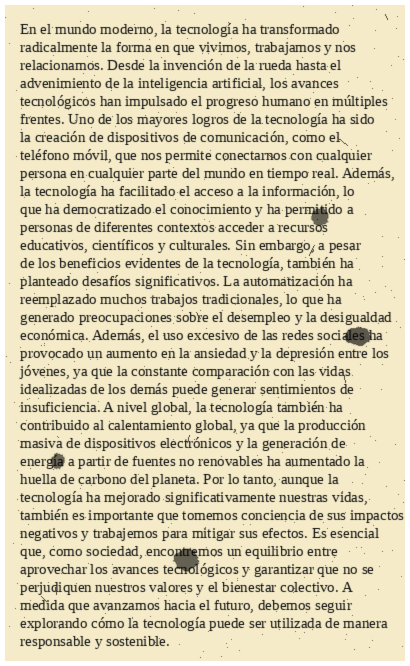

In [132]:
output_image = generate_aged_text_image(text1)
output_image.show()
output_image.save("text1.png")
img = Image.open("text1.png")
display(img)

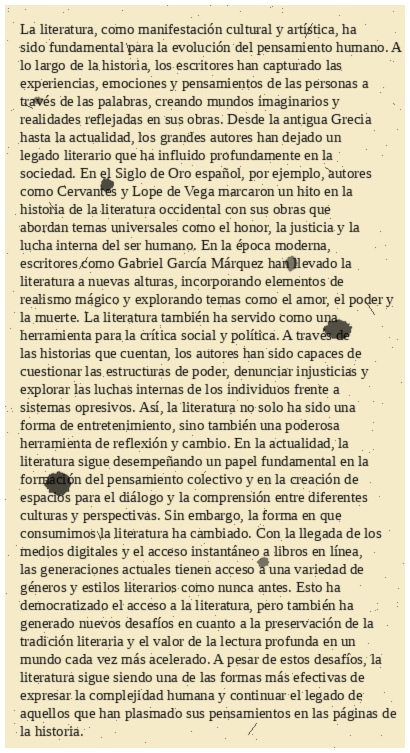

In [133]:
output_image = generate_aged_text_image(text2)
output_image.show()
output_image.save("text2.png")
img2 = Image.open("text2.png")
display(img2)

In [134]:
from PIL import Image
import random

def preprocess_and_superimpose(image1_path, image2_path, output_path):
    # Load the images
    image1 = Image.open(image1_path).convert("RGBA")  # Ensure image1 has an alpha channel
    image2 = Image.open(image2_path).convert("RGBA")  # Ensure image2 has an alpha channel

    # Step 1: Mirror image2 horizontally
    image2 = image2.transpose(Image.FLIP_LEFT_RIGHT)

    # Step 2: Rotate image2
    rotation_angle = random.uniform(0, 1.5)
    image2 = image2.rotate(rotation_angle, expand=True)

    # Step 3: Change transparency of image2 to 10% of the original value
    # Split into RGBA channels
    r, g, b, a = image2.split()

    # Reduce alpha (transparency) to 10% of its original value
    a = a.point(lambda i: i * 0.2)

    # Recombine the channels
    image2 = Image.merge("RGBA", (r, g, b, a))

    # Step 4: Resize image2 to match image1's size
    image2 = image2.resize(image1.size, Image.Resampling.LANCZOS)

    # Step 5: Superimpose image2 onto image1 using alpha_composite
    superimposed_image = Image.alpha_composite(image1, image2)

    # Step 6: Crop the resulting image to image1's original size
    superimposed_image = superimposed_image.crop((0, 0, image1.width, image1.height))

    # Save or display the result
    superimposed_image.save(output_path)
    superimposed_image.show()

# Example usage
preprocess_and_superimpose("text1.png", "text2.png", 'superimposed_image.png')


In [122]:
preprocess_and_superimpose( "text2.png","text1.png", 'superimposed_image2.png')


In [123]:
text3 = '''
La educación es uno de los pilares fundamentales para el progreso de cualquier sociedad. A través de la enseñanza, las personas adquieren las habilidades y conocimientos necesarios para desarrollarse plenamente y contribuir al bienestar colectivo. La educación no solo tiene un impacto en la vida individual de las personas, sino que también juega un papel clave en el desarrollo económico, social y cultural de las naciones.

En los últimos años, la educación ha experimentado grandes cambios debido a la tecnología. La digitalización de los recursos educativos ha permitido que el aprendizaje sea más accesible y flexible, permitiendo que personas de diferentes partes del mundo tengan acceso a contenidos de calidad. Las plataformas en línea, las aulas virtuales y los cursos masivos abiertos en línea (MOOC) han democratizado la educación, brindando oportunidades de aprendizaje a aquellos que no tienen acceso a una educación tradicional en sus comunidades.

Sin embargo, la educación digital también presenta desafíos. A pesar de que la tecnología ha facilitado el acceso a la información, no todos los estudiantes tienen las mismas oportunidades de conectividad o acceso a dispositivos adecuados para aprovechar estas herramientas. La brecha digital sigue siendo un problema importante, y es esencial que se sigan implementando políticas que garanticen que todos los estudiantes tengan acceso a una educación de calidad, independientemente de su ubicación o situación económica.

Además, la educación no debe centrarse únicamente en el aprendizaje académico. Es fundamental que los sistemas educativos también fomenten el desarrollo de habilidades sociales, emocionales y éticas. La educación debe enseñar a los estudiantes a pensar críticamente, a trabajar en equipo y a ser responsables y respetuosos con los demás. La formación en valores y la educación en derechos humanos son esenciales para formar ciudadanos comprometidos con la construcción de una sociedad más justa y equitativa.

En este sentido, la educación debe ser inclusiva y respetar la diversidad. Los sistemas educativos deben adaptarse a las necesidades de todos los estudiantes, independientemente de su origen, género, discapacidad o cualquier otra característica. La inclusión es clave para garantizar que todos los estudiantes tengan la oportunidad de alcanzar su máximo potencial.

En resumen, la educación es la herramienta más poderosa para transformar la sociedad y el mundo. Es esencial que se sigan invirtiendo recursos en la mejora de los sistemas educativos y que se utilicen las tecnologías de manera responsable y equitativa para garantizar que todos los estudiantes tengan acceso a una educación de calidad. Solo a través de una educación integral y accesible podemos construir un futuro más justo, sostenible y próspero.
'''


In [124]:
text4 = '''
El arte ha sido una forma de expresión humana durante miles de años, y sigue siendo una herramienta poderosa para transmitir ideas, emociones y perspectivas únicas sobre el mundo que nos rodea. A través de la pintura, la escultura, la música, el cine y otras disciplinas artísticas, los seres humanos han logrado comunicar lo más profundo de su ser, conectando a las personas a través de experiencias universales.

El arte no solo tiene un valor estético, sino que también tiene un impacto profundo en la cultura y la sociedad. Las obras de arte pueden desafiar las normas establecidas, cuestionar el status quo y provocar reflexiones sobre temas importantes como la justicia social, la libertad, la identidad y la política. Los artistas a menudo actúan como agentes de cambio, utilizando su trabajo para inspirar transformaciones en la forma en que pensamos y vivimos.

En la actualidad, el arte sigue siendo un medio vital para la innovación y la creatividad. Las nuevas tecnologías han permitido que los artistas experimenten con nuevos medios y formas de expresión, como el arte digital y la realidad aumentada. Sin embargo, la digitalización del arte también ha planteado preguntas sobre la autenticidad, la propiedad y el valor de las obras de arte en el mundo virtual. A medida que el arte se mueve hacia el mundo digital, es fundamental que se reconozcan y respeten los derechos de los artistas, y que se encuentren formas justas de valorar sus obras en un mercado en constante cambio.

El arte también desempeña un papel importante en la educación. La formación artística permite a los estudiantes desarrollar habilidades creativas y de pensamiento crítico que les serán útiles en cualquier campo de estudio o profesión. Además, el arte ayuda a las personas a comprenderse a sí mismas y a los demás, fomentando la empatía y la apreciación de la diversidad cultural.

En conclusión, el arte es una parte esencial de la vida humana. Nos permite expresarnos, reflexionar sobre nuestro entorno y conectar con los demás. En un mundo cada vez más tecnológico y globalizado, el arte sigue siendo una forma única de explorar y comprender la experiencia humana, y su valor en la sociedad no debe ser subestimado. Debemos seguir apoyando a los artistas y promoviendo el acceso al arte para todos, ya que su poder para inspirar y transformar es invaluable.
'''


In [125]:
text5 = '''
El cambio climático es una de las mayores amenazas que enfrenta nuestro planeta en la actualidad. Los efectos de las actividades humanas, como la quema de combustibles fósiles y la deforestación, están acelerando el calentamiento global, lo que provoca cambios drásticos en los patrones climáticos y una creciente cantidad de fenómenos meteorológicos extremos. Las consecuencias del cambio climático ya son evidentes en muchas regiones del mundo, con aumento de la temperatura, sequías prolongadas, incendios forestales, inundaciones y la pérdida de biodiversidad.

Uno de los principales efectos del cambio climático es el aumento del nivel del mar, provocado por el derretimiento de los glaciares y la expansión térmica del agua. Esto pone en peligro a muchas ciudades costeras y a las comunidades que dependen de ellas. Además, el aumento de las temperaturas globales está afectando los ecosistemas y la biodiversidad, lo que amenaza a muchas especies de animales y plantas que no pueden adaptarse a los cambios tan rápidos.

El cambio climático también está afectando la agricultura, ya que las sequías y las temperaturas extremas reducen la productividad de los cultivos y provocan la escasez de alimentos en varias regiones del mundo. Esto tiene un impacto directo en la seguridad alimentaria y en la economía de muchos países, especialmente aquellos que dependen de la agricultura como principal fuente de ingresos.

A pesar de la gravedad del problema, aún hay tiempo para tomar medidas para mitigar los efectos del cambio climático. Es fundamental que los gobiernos, las empresas y los individuos trabajen juntos para reducir las emisiones de gases de efecto invernadero, promover el uso de energías renovables y adoptar prácticas sostenibles en todos los aspectos de la vida. La cooperación internacional es esencial para enfrentar este desafío global, y los países deben comprometerse a implementar políticas más estrictas para reducir las emisiones y proteger el medio ambiente.

En conclusión, el cambio climático es una crisis que requiere una acción inmediata y global. Es necesario que tomemos conciencia de la gravedad del problema y actuemos con responsabilidad para asegurar un futuro sostenible para las generaciones venideras. La tecnología y la innovación pueden desempeñar un papel fundamental en la solución de este problema, pero solo si todos colaboramos para reducir nuestra huella ecológica y proteger los recursos naturales de nuestro planeta.
'''


In [126]:
text6 = '''
La salud mental es un aspecto fundamental del bienestar humano que, a menudo, se pasa por alto en comparación con la salud física. Sin embargo, es igual de importante para llevar una vida plena y equilibrada. La salud mental influye en cómo pensamos, sentimos y actuamos en nuestra vida diaria. Afecta nuestra capacidad para manejar el estrés, tomar decisiones, establecer relaciones saludables y enfrentarnos a los desafíos de la vida.

En los últimos años, la conciencia sobre la importancia de la salud mental ha aumentado significativamente. A pesar de ello, todavía existen muchos estigmas y tabúes alrededor de los trastornos mentales. Muchas personas no buscan ayuda debido al miedo de ser juzgadas o rechazadas, lo que agrava su situación. Este estigma social hace que la salud mental sea un tema difícil de abordar, pero es crucial que sigamos trabajando para cambiar esta percepción y promover un enfoque más abierto y comprensivo.

Uno de los factores que contribuye al deterioro de la salud mental es el estrés crónico. Vivimos en una sociedad que a menudo exige más de lo que podemos manejar, y el estrés laboral, académico y familiar puede tener un impacto negativo en nuestra salud mental. Además, la pandemia de COVID-19 exacerbó muchos problemas relacionados con la salud mental, como la ansiedad, la depresión y el aislamiento social. Muchas personas se vieron obligadas a enfrentar nuevas realidades, y la incertidumbre sobre el futuro agravó la situación.

Es fundamental que se promuevan políticas públicas que prioricen la salud mental, tanto a nivel nacional como internacional. Los servicios de salud mental deben ser accesibles para todos, independientemente de su nivel socioeconómico. Es necesario aumentar la inversión en programas de prevención, tratamiento y apoyo para las personas que enfrentan trastornos mentales. La atención psicológica y psiquiátrica debe estar disponible de manera oportuna, y los profesionales deben ser capacitados para brindar un apoyo adecuado y comprensivo.

Además, la educación juega un papel crucial en la promoción de la salud mental. Desde una edad temprana, los niños y adolescentes deben aprender sobre la importancia de cuidar su bienestar emocional. Las escuelas deben ofrecer programas que fomenten la resiliencia, la empatía y la inteligencia emocional. Al mismo tiempo, las familias deben ser conscientes de la necesidad de apoyar a sus hijos en la gestión de sus emociones y en la búsqueda de ayuda cuando sea necesario.

En conclusión, la salud mental es un derecho fundamental que debe ser tratado con la misma importancia que la salud física. Es necesario seguir luchando para eliminar el estigma asociado a los trastornos mentales y garantizar que todas las personas tengan acceso a los recursos necesarios para cuidar de su bienestar emocional. Al promover una mayor comprensión y apoyo, podemos construir una sociedad más sana, empática y resiliente.
'''


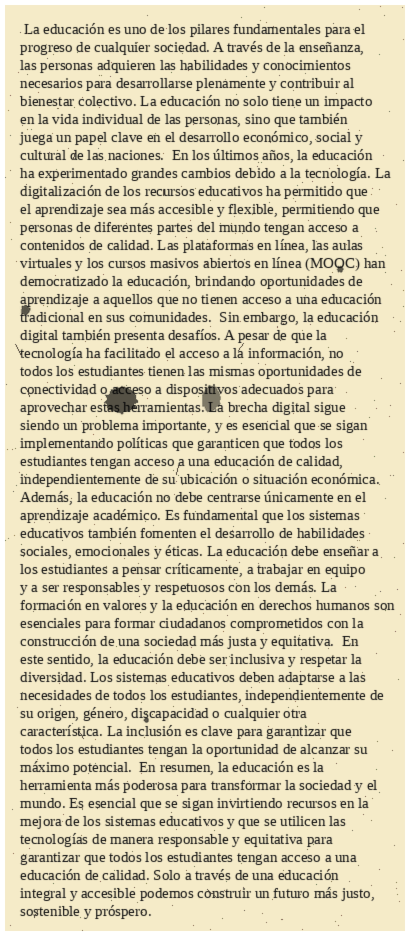

In [127]:
output_image = generate_aged_text_image(text3)
output_image.show()
output_image.save("text3.png")
img3 = Image.open("text3.png")
display(img3)

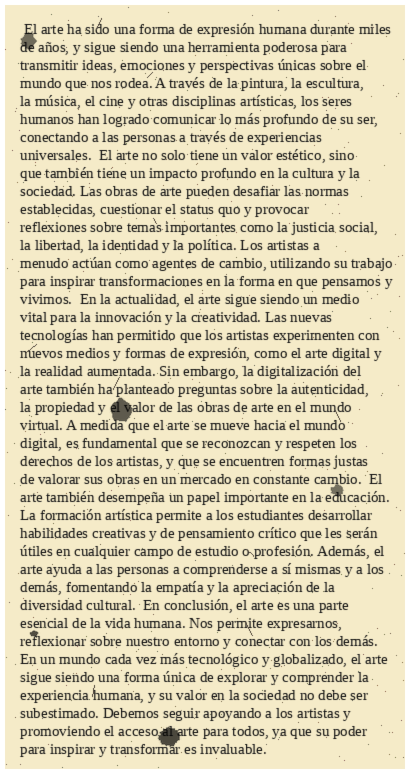

In [131]:
output_image = generate_aged_text_image(text4)
output_image.show()
output_image.save("text4.png")
img4 = Image.open("text4.png")
display(img4)

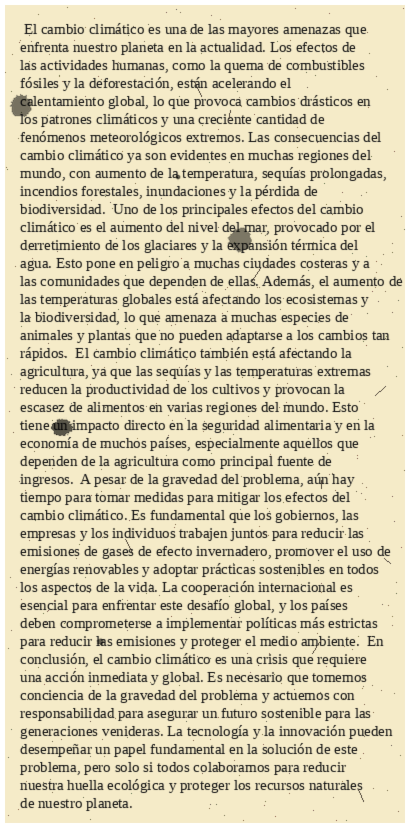

In [130]:
output_image = generate_aged_text_image(text5)
output_image.show()
output_image.save("text5.png")
img5 = Image.open("text5.png")
display(img5)

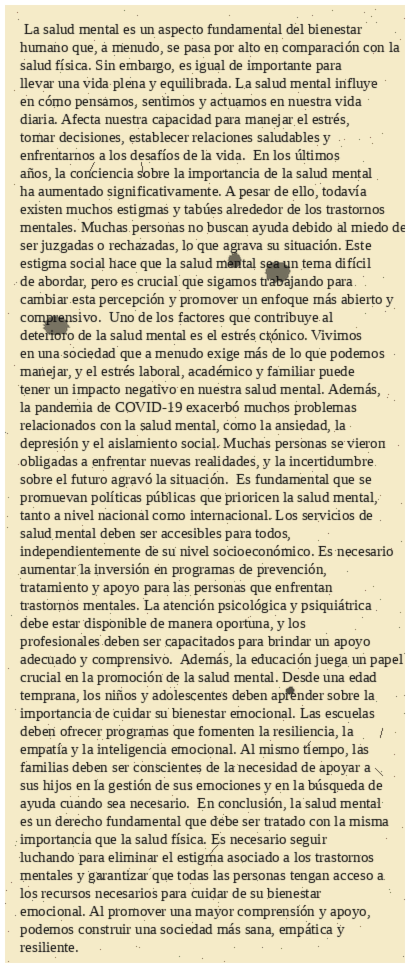

In [135]:
output_image = generate_aged_text_image(text6)
output_image.show()
output_image.save("text6.png")
img6 = Image.open("text6.png")
display(img6)

In [136]:
preprocess_and_superimpose("text3.png", "text4.png", 'superimposed_image3.png')
preprocess_and_superimpose("text4.png", "text3.png", 'superimposed_image4.png')
preprocess_and_superimpose("text5.png", "text6.png", 'superimposed_image5.png')
preprocess_and_superimpose("text6.png", "text5.png", 'superimposed_image6.png')



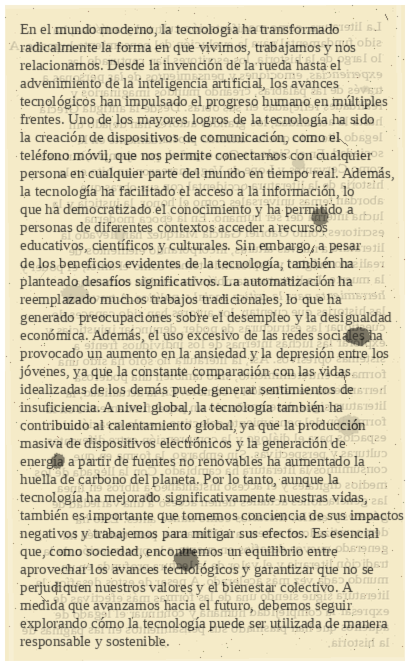

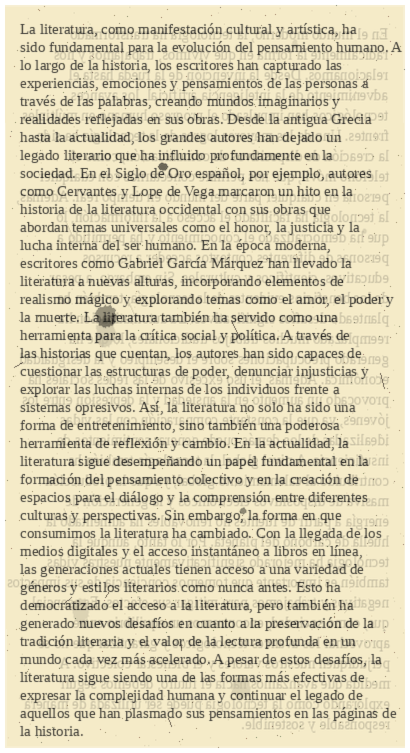

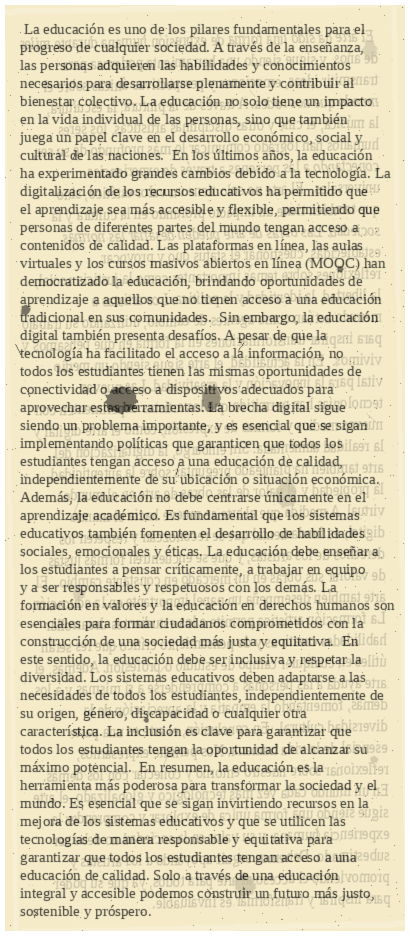

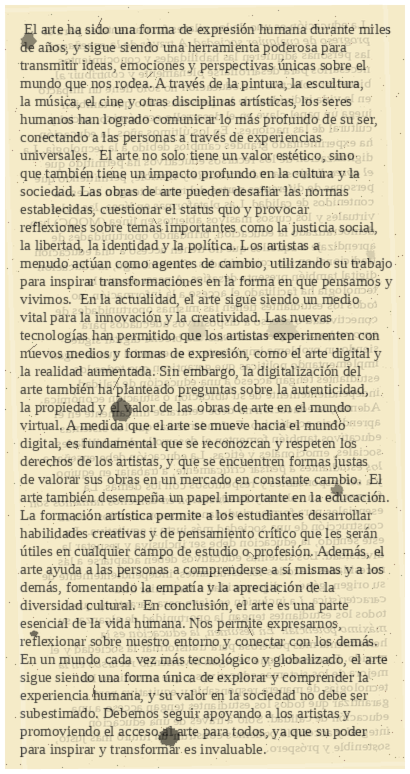

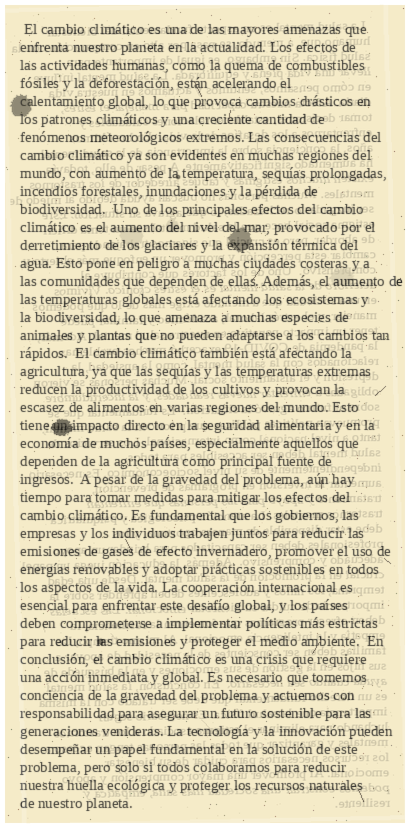

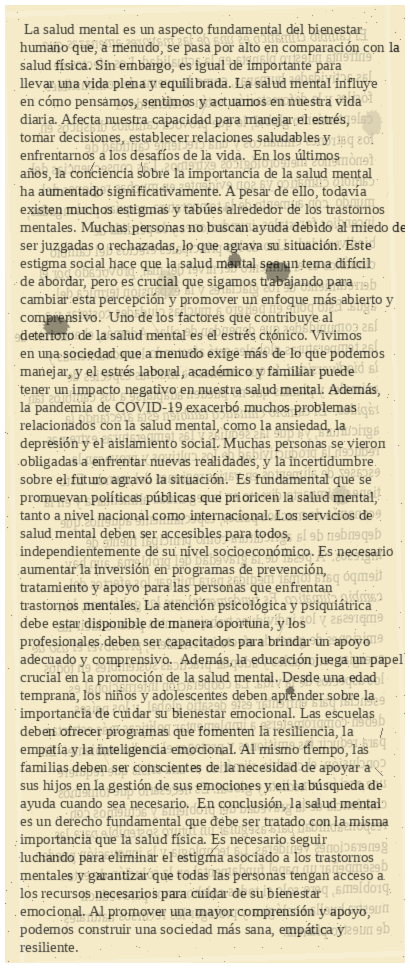

In [137]:
from IPython.display import display
from PIL import Image

# Display the superimposed images
display(Image.open('superimposed_image.png'))
display(Image.open('superimposed_image2.png'))
display(Image.open('superimposed_image3.png'))
display(Image.open('superimposed_image4.png'))
display(Image.open('superimposed_image5.png'))
display(Image.open('superimposed_image6.png'))
